# PAP2 Versuch 242: Spannungsverstärkung

Aufgabe 1a: Gleichspannungsverstärkung

TypeError: f() argument after * must be an iterable, not numpy.float64

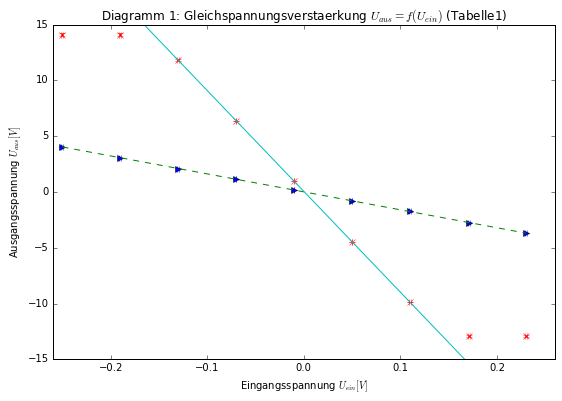

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
from scipy.optimize import curve_fit

U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err = np.loadtxt('tab1.txt', skiprows=1, usecols=(0,1,2,3,4,5), unpack=True)

def f(x, A, B): # Definition der Ausgleichsgerade y=f(x)
    return A*x + B

A1,B1 = curve_fit(f, U_ein, U_aus1)[0] # Fit für Gerade 1
A2,B2 = curve_fit(f, U_ein[2:-2], U_aus2[2:-2])[0] # Fit für Gerade 2

popt, pcov = curve_fit(f, U_ein, U_aus1)
plt.plot(U_ein, f(U_ein, *popt), linestyle = '-.')
print('A1, B1 sind:')
print A1,B1
print('popt, pcov sind:') 
print popt, pcov

print('Standardabweichung ist:')
perr = np.sqrt(np.diag(pcov))
print perr


fig,ax = plt.subplots(1)

ax.errorbar(U_ein, U_aus1, linestyle='None', marker='>', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
ax.plot(U_ein, f(U_ein, A1, B1), linestyle='--', label='$m_{fit}=%.2f, (t_{fit}=%.2f)$' %(A1, B1))

ax.errorbar(U_ein, U_aus2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)
ax.plot(U_ein, f(U_ein, A2, B2), label='$m_{fit}=%.2f, (t_{fit}=%.2f)$' %(A2, B2))

handles,labels = ax.get_legend_handles_labels()

plt.xlabel('Eingangsspannung $U_{ein} [V]$')
plt.ylabel('Ausgangsspannung $U_{aus} [V]$')
plt.title('Diagramm 1: Gleichspannungsverstaerkung $U_{aus}=f(U_{ein})$ (Tabelle1)')
plt.ylim((-15,15))
plt.xlim((-0.26, 0.26))

plt.plot(U_ein, f(U_ein, *popt), linestyle = '-.')
print('A1, B1 sind:')
print A1,B1
print('popt, pcov sind:') 
print popt, pcov

print('Standardabweichung ist:')
perr = np.sqrt(np.diag(pcov))
print perr

handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[1], handles[2], handles[0]]
labels = [labels[3], labels[1], labels[2], labels[0]]
ax.legend(handles, labels, title='Gegenkoppelwiderstaende und Parameter\nder Ausgleichsgeraden $y(x)=m*x(+t)$', borderpad=1, borderaxespad=1, loc='best', shadow='true')
#plt.savefig('V242_A1a.png', dpi=300)

Aufgabe 1b: Wechselspannungsverstärkung

A3, B3 sind:
219.240060986 -0.453924159598
popt, pcov sind:
[ 219.24006099   -0.45392416] [[ 36.12618121  -2.0477523 ]
 [ -2.0477523    0.14277795]]
Standardabweichung ist:
[ 6.0105059   0.37785969]


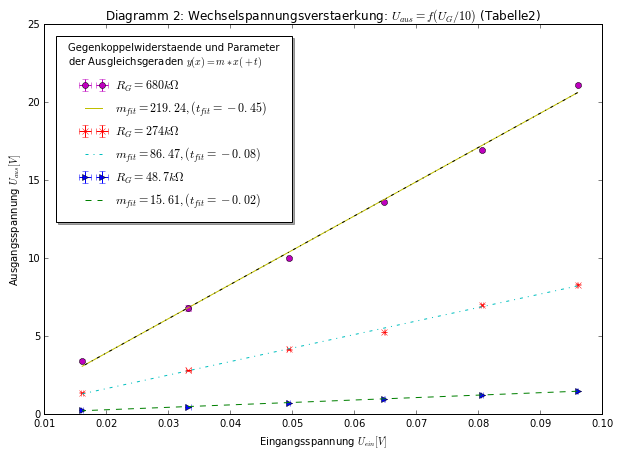

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err, U_aus3, aus3_err = np.loadtxt('tab2.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7), unpack=True)

U_ein = U_ein/10
ein_err = ein_err/10

def f(x, A, B): # Definition der Ausgleichsgerade y=f(x)
    return A*x + B

A1,B1 = curve_fit(f, U_ein, U_aus1)[0] # Fit für Gerade 1
A2,B2 = curve_fit(f, U_ein, U_aus2)[0] # Fit für Gerade 2
A3,B3 = curve_fit(f, U_ein, U_aus3)[0] # Fit für Gerade 3




fig,ax = plt.subplots(1)

ax.errorbar(U_ein, U_aus1, linestyle='None', marker='>', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
ax.plot(U_ein, f(U_ein, A1, B1), linestyle='--', label='$m_{fit}=%.2f, (t_{fit}=%.2f)$' %(A1, B1))

ax.errorbar(U_ein, U_aus2, linestyle='None', marker='x', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)
ax.plot(U_ein, f(U_ein, A2, B2), linestyle='-.', label='$m_{fit}=%.2f, (t_{fit}=%.2f)$' %(A2, B2))

ax.errorbar(U_ein, U_aus3, linestyle='None', marker='o', label='$R_{G}=680 k\Omega$', xerr=ein_err, yerr=aus3_err)
ax.plot(U_ein, f(U_ein, A3, B3), linestyle='-', label='$m_{fit}=%.2f, (t_{fit}=%.2f)$' %(A3, B3))

handles,labels = ax.get_legend_handles_labels()
handles = [handles[5], handles[2], handles[4], handles[1], handles[3], handles[0]]
labels = [labels[5], labels[2], labels[4], labels[1], labels[3], labels[0]]

plt.xlabel('Eingangsspannung $U_{ein} [V]$')
plt.ylabel('Ausgangsspannung $U_{aus} [V]$')
plt.title('Diagramm 2: Wechselspannungsverstaerkung: $U_{aus}=f(U_{G}/10)$ (Tabelle2)')
ax.legend(handles, labels, title='Gegenkoppelwiderstaende und Parameter\nder Ausgleichsgeraden $y(x)=m*x(+t)$', borderpad=1, borderaxespad=1, loc='best', shadow='true')
#plt.savefig('V242_A1b.png', dpi=300)


popt, pcov = curve_fit(f, U_ein, U_aus3)
plt.plot(U_ein, f(U_ein, *popt), linestyle = '-.')
print('A3, B3 sind:')
print A3,B3
print('popt, pcov sind:') 
print popt, pcov
print('Standardabweichung ist:')
perr = np.sqrt(np.diag(pcov))
print perr




Aufgabe 2: Frequenzgang mit Gegenkopplungen und Kondensator

Current size: [10.0, 7.0]


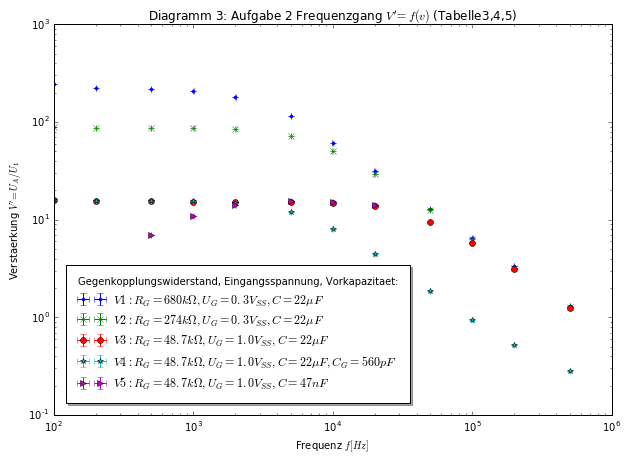

In [29]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

f, f_err, U_A1, A1_err, U_A2, A2_err, U_A3, A3_err, U_A4, A4_err, U_A5, A5_err = np.loadtxt('tab3.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7,8,9,10,11), unpack=True)

U_A1 = U_A1/0.3
U_A2 = U_A2/0.3

plt.xscale('log')
plt.yscale('log')

plt.errorbar(f, U_A1*10, linestyle='None', marker='.', label='$V1: R_{G}=680 k\Omega, U_{G}=0.3 V_{SS}, C=22 \mu F$', xerr=f_err, yerr=A1_err)
plt.errorbar(f, U_A2*10, linestyle='None', marker='x', label='$V2: R_{G}=274 k\Omega, U_{G}=0.3 V_{SS}, C=22 \mu F$ ', xerr=f_err, yerr=A2_err)
plt.errorbar(f, U_A3*10, linestyle='None', marker='o', label='$V3: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=22 \mu F$', xerr=f_err, yerr=A3_err)
plt.errorbar(f, U_A4*10, linestyle='None', marker='*', label='$V4: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=22 \mu F, C_{G}=560 pF$', xerr=f_err, yerr=A4_err)
plt.errorbar(f, U_A5*10, linestyle='None', marker='>', label='$V5: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=47 nF$', xerr=f_err, yerr=A5_err)

plt.xlabel('Frequenz $f  [Hz]$ ')
plt.ylabel('Verstaerkung $V\'={U_{A}}/{U_{1}}$')
#frac{U_{aus}}{\frac{1}{10}\U_{G}
plt.title('Diagramm 3: Aufgabe 2 Frequenzgang $V\'=f(v)$ (Tabelle3,4,5)')
plt.legend(title='Gegenkopplungswiderstand, Eingangsspannung, Vorkapazitaet:', borderpad=1, borderaxespad=1, loc='lower left', shadow='true')

plt.savefig('V242_A2.png', dpi=300)